In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aerofit_treadmill.csv")

In [4]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Bivariate Analysis

In [60]:
num_att = []
obj_att = []
for i in df.columns[1:]:
    if df[i].dtype=='int64':
        num_att.append(i)
    else:
        obj_att.append(i)

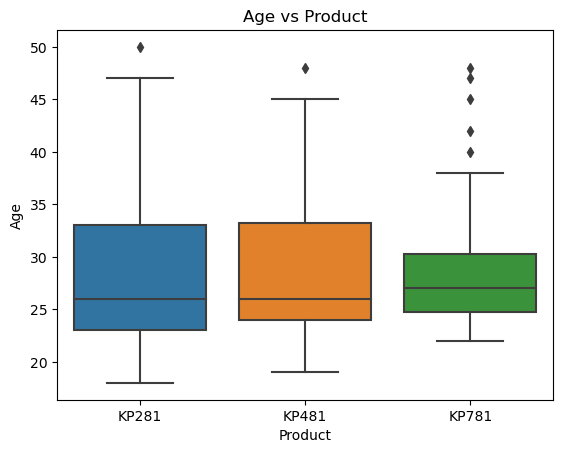

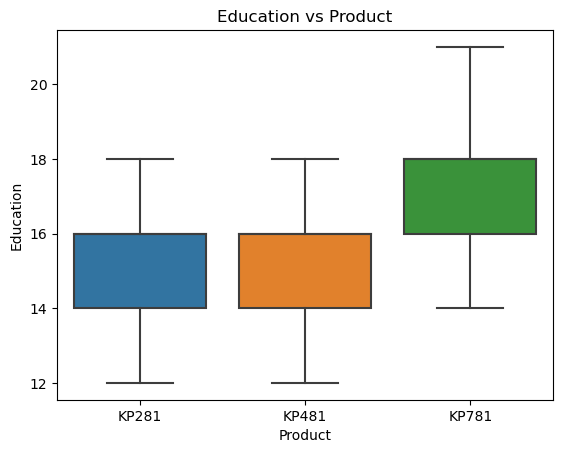

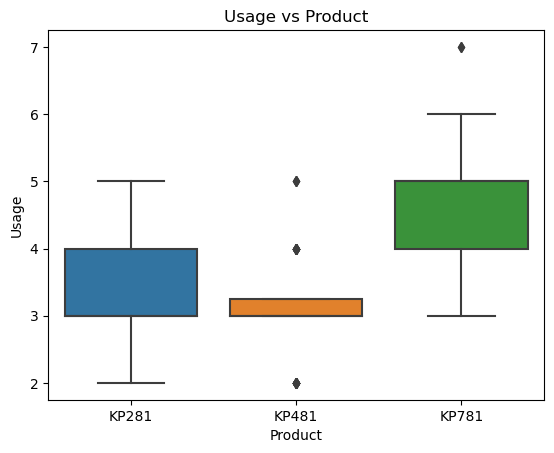

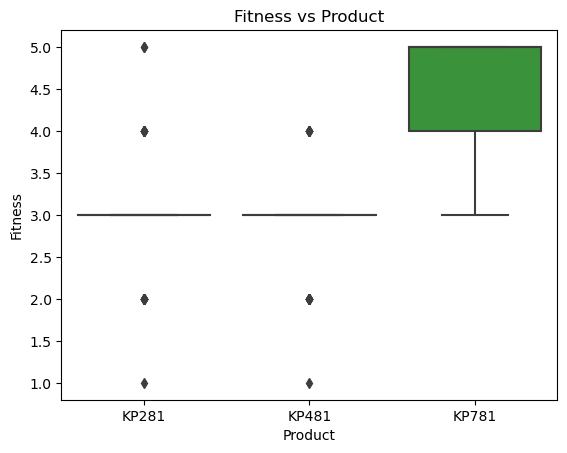

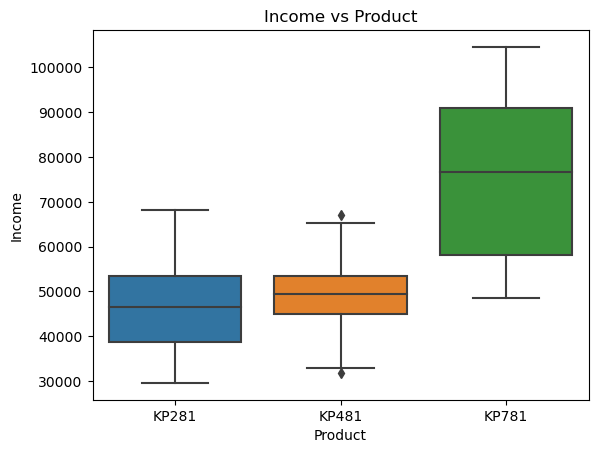

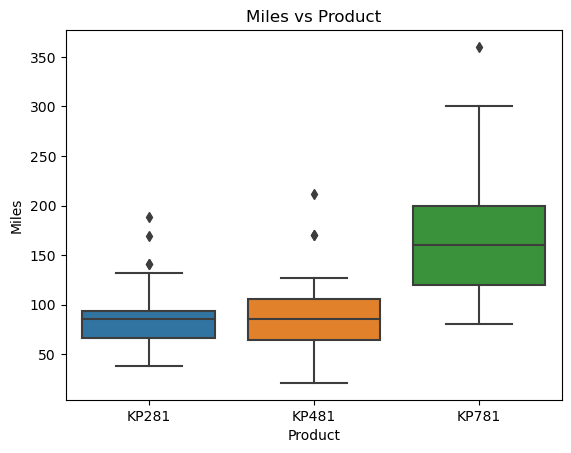

In [51]:
for i in num_att:
    plt.figure()
    sns.boxplot(x=df['Product'],y=df[i])
    plt.title(i+" vs Product")

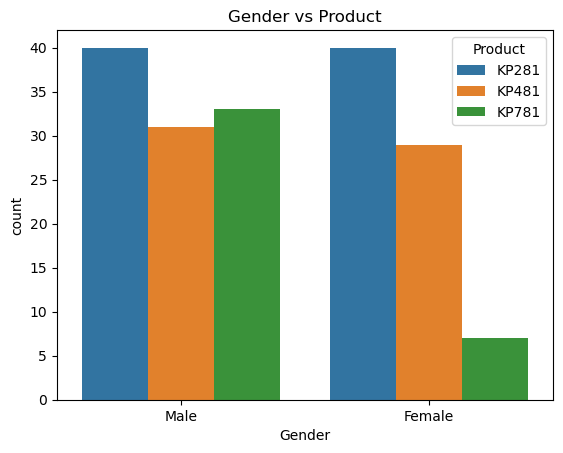

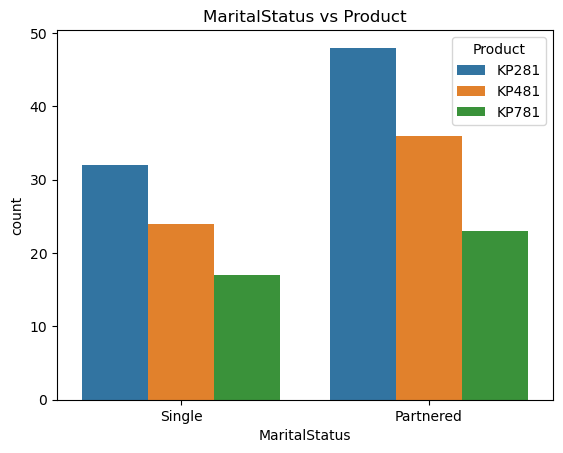

In [61]:
for i in obj_att:
    plt.figure()
    sns.countplot(x=i,hue='Product',data=df)
    plt.title(i+" vs Product")

- With increase in price women's tends to purchase less - Women's are price concious
- Male bought KP781 more than women
- Whether the person in Single or Partnered both are price concious

<AxesSubplot:xlabel='Education', ylabel='count'>

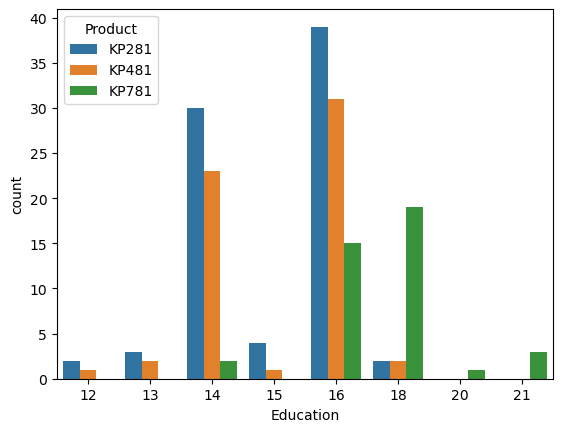

In [62]:
sns.countplot(x='Education',hue='Product',data=df)

- People largere than 18 ed level wants to buy KP781 more where as less than 18 are price concious

<AxesSubplot:xlabel='Usage', ylabel='count'>

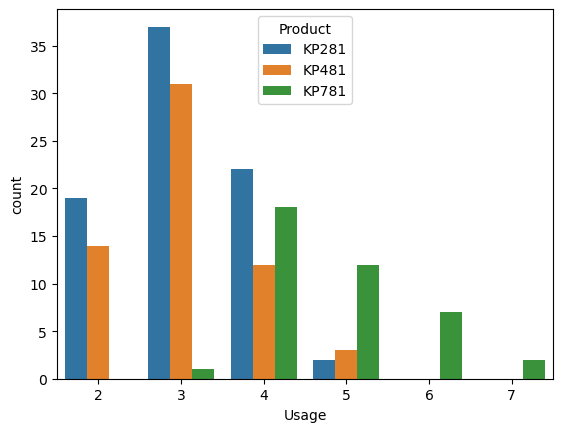

In [63]:
sns.countplot(x='Usage',hue='Product',data=df)

- People with more usage buy KP781 where as people with less usage tends to buy KP281 more

<AxesSubplot:xlabel='Fitness', ylabel='count'>

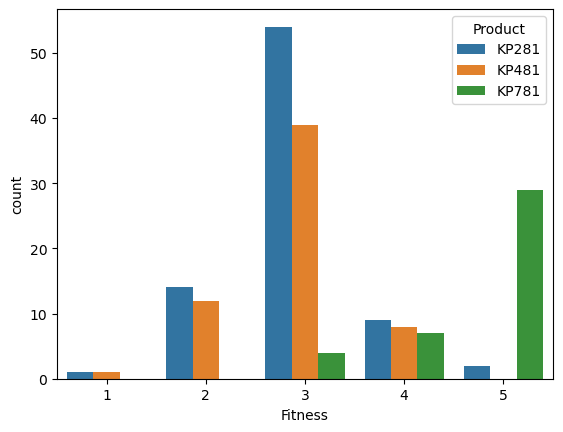

In [64]:
sns.countplot(x='Fitness',hue='Product',data=df)

- People with max fitness buys KP781 more where as others buy KP281 and KP481 more

<AxesSubplot:>

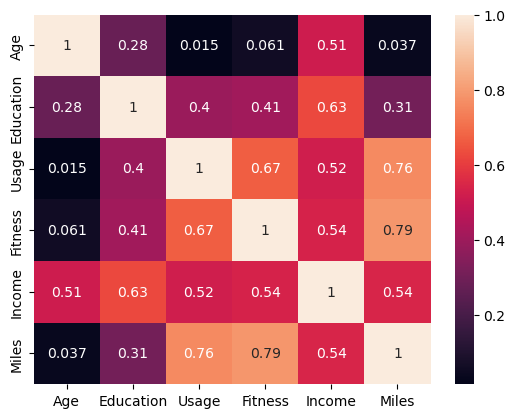

In [3]:
sns.heatmap(df.corr(),annot=True)

From above plot we can see which attribute is correlated with which one

In [4]:
pd.crosstab(index=df['Gender'],columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [5]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [7]:
# marginal probablity
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [9]:
# conditional probablity
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


P(KP281|FEMALE)=0.5263

In [10]:
#conditional
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


P(FEMALE|KP781)=0.0.175